In [1]:
from fontTools.ttLib import TTFont
import os

FONT_PATH = globals().get('FONT_PATH', './elis.ttf')
if not os.path.exists(FONT_PATH):
    raise FileNotFoundError(FONT_PATH)

font = TTFont(FONT_PATH)


In [3]:

# número de glifos (glyphs) definidos na fonte
glyph_count = len(font.getGlyphOrder())
print(f'Número de glifos na fonte: {glyph_count}')


Número de glifos na fonte: 149


In [4]:

# coletar codepoints mapeados nas subtables Unicode do cmap
codepoints = set()
if 'cmap' in font:
    for table in font['cmap'].tables:
        try:
            if table.isUnicode():
                codepoints.update(table.cmap.keys())
        except Exception:
            # fallback: incluir chaves inteiras mesmo se isUnicode não existir
            codepoints.update(k for k in table.cmap.keys() if isinstance(k, int))

codepoint_count = len(codepoints)

print("Fonte:", FONT_PATH)
print("Glifos (glyphs):", glyph_count)
print("Codepoints Unicode mapeados (cmap):", codepoint_count)
# opcional: algumas amostras
print("Exemplos de codepoints:", sorted(list(codepoints))[:20])

Fonte: ./elis.ttf
Glifos (glyphs): 149
Codepoints Unicode mapeados (cmap): 146
Exemplos de codepoints: [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]


In [7]:
# Exibir o glifo do codepoint U+0040
if 0x0040 in codepoints:
    glyph_name = font.getBestCmap().get(0x0040)
    if glyph_name:
        print(f'Glifo para U+0040: {glyph_name}')
    else:
        print('Glifo para U+0040 não encontrado no cmap.')


Glifo para U+0040: at


In [19]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
import os

def render_glyph_bitmap(font_path, char_or_codepoint, image_size=256, font_px=None, bgcolor=255, fgcolor=0):
    if not os.path.exists(font_path):
        raise FileNotFoundError(font_path)
    if isinstance(char_or_codepoint, int):
        ch = chr(char_or_codepoint)
    else:
        ch = str(char_or_codepoint)

    # escolher tamanho da fonte em px se não fornecido
    if font_px is None:
        font_px = int(image_size * 0.8)

    font = ImageFont.truetype(font_path, size=font_px)
    # criar imagem e desenhar centralizado usando getbbox para posição exata
    img = Image.new('L', (image_size, image_size), color=bgcolor)
    draw = ImageDraw.Draw(img)
    bbox = font.getbbox(ch)  # (x0, y0, x1, y1) relativo à origem
    w = bbox[2] - bbox[0]
    h = bbox[3] - bbox[1]
    x = (image_size - w)//2 - bbox[0]
    y = (image_size - h)//2 - bbox[1]
    draw.text((x, y), ch, font=font, fill=fgcolor)
    display(img)
    return img

# Exemplo:
# render_glyph_bitmap('./elis.ttf', 0x0040, image_size=256)  # '@'
# render_glyph_bitmap('./elis.ttf', 'A', image_size=256, font_px=200)

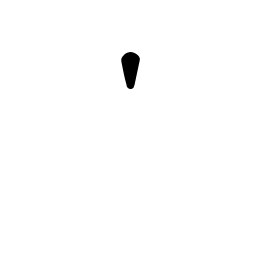

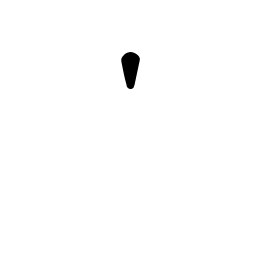

In [20]:

# Exemplo:
render_glyph_bitmap('./elis.ttf', 0x00FD, image_size=256)  # '@'
# render_glyph_bitmap('./elis.ttf', 'A', image_size=256, font_px=200)

Codepoint U+0021:


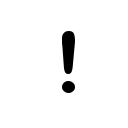

Codepoint U+0022:


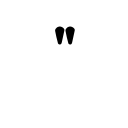

Codepoint U+0023:


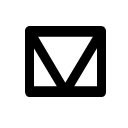

Codepoint U+0024:


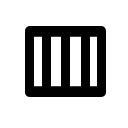

Codepoint U+0025:


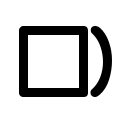

Codepoint U+0026:


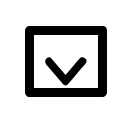

Codepoint U+0027:


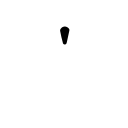

Codepoint U+0028:


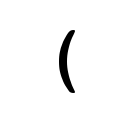

Codepoint U+0029:


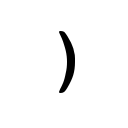

Codepoint U+002A:


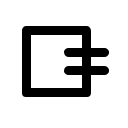

Codepoint U+002B:


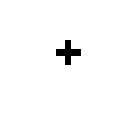

Codepoint U+002C:


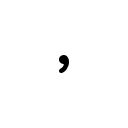

Codepoint U+002D:


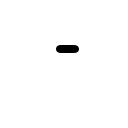

Codepoint U+002E:


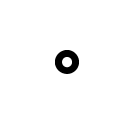

Codepoint U+002F:


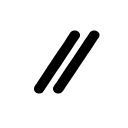

Codepoint U+0030:


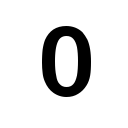

Codepoint U+0031:


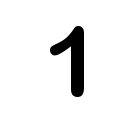

Codepoint U+0032:


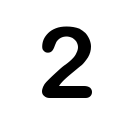

Codepoint U+0033:


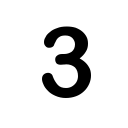

Codepoint U+0034:


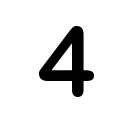

Codepoint U+0035:


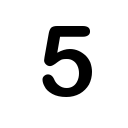

Codepoint U+0036:


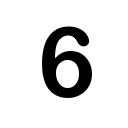

Codepoint U+0037:


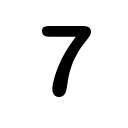

Codepoint U+0038:


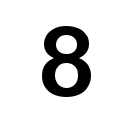

Codepoint U+0039:


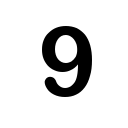

Codepoint U+003A:


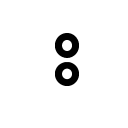

Codepoint U+003B:


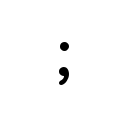

Codepoint U+003C:


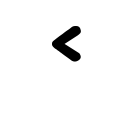

Codepoint U+003E:


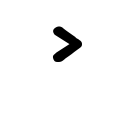

Codepoint U+003F:


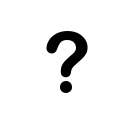

Codepoint U+0040:


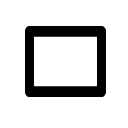

Codepoint U+0041:


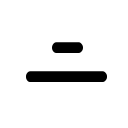

Codepoint U+0042:


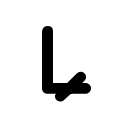

Codepoint U+0043:


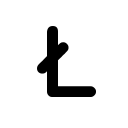

Codepoint U+0044:


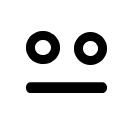

Codepoint U+0045:


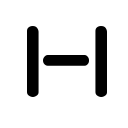

Codepoint U+0046:


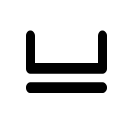

Codepoint U+0047:


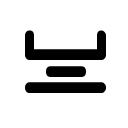

Codepoint U+0048:


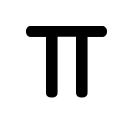

Codepoint U+0049:


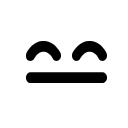

Codepoint U+004A:


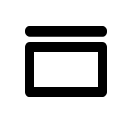

Codepoint U+004B:


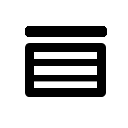

Codepoint U+004C:


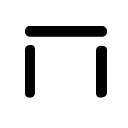

Codepoint U+004D:


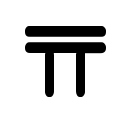

Codepoint U+004E:


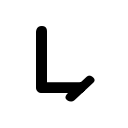

Codepoint U+004F:


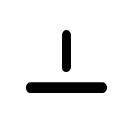

Codepoint U+0050:


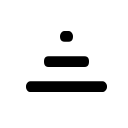

Codepoint U+0051:


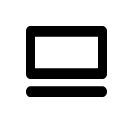

Codepoint U+0052:


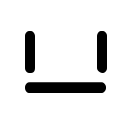

Codepoint U+0053:


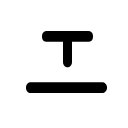

Codepoint U+0054:


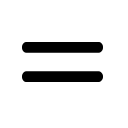

Codepoint U+0055:


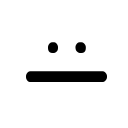

Codepoint U+0056:


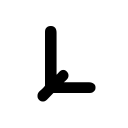

Codepoint U+0057:


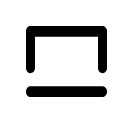

Codepoint U+0058:


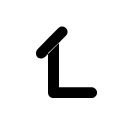

Codepoint U+0059:


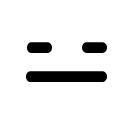

Codepoint U+005A:


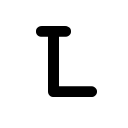

Codepoint U+005C:


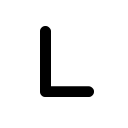

Codepoint U+005F:


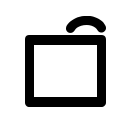

Codepoint U+0061:


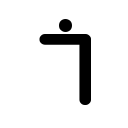

Codepoint U+0062:


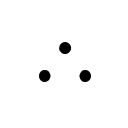

Codepoint U+0063:


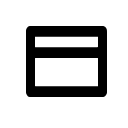

Codepoint U+0064:


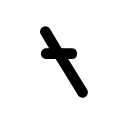

Codepoint U+0065:


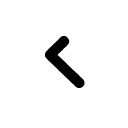

Codepoint U+0066:


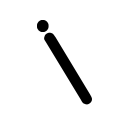

Codepoint U+0067:


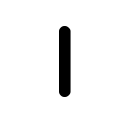

Codepoint U+0068:


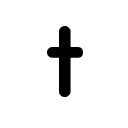

Codepoint U+0069:


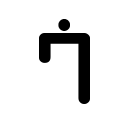

Codepoint U+006A:


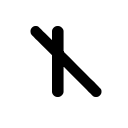

Codepoint U+006B:


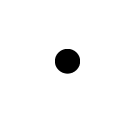

Codepoint U+006C:


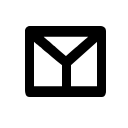

Codepoint U+006D:


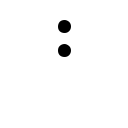

Codepoint U+006E:


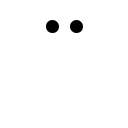

Codepoint U+006F:


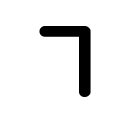

Codepoint U+0070:


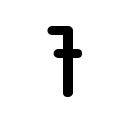

Codepoint U+0071:


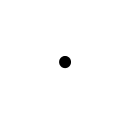

Codepoint U+0072:


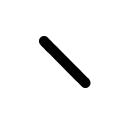

Codepoint U+0073:


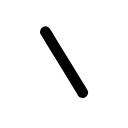

Codepoint U+0074:


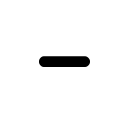

Codepoint U+0075:


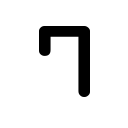

Codepoint U+0076:


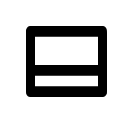

Codepoint U+0077:


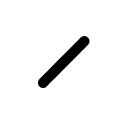

Codepoint U+0078:


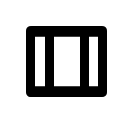

Codepoint U+0079:


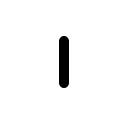

Codepoint U+007A:


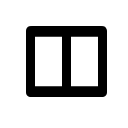

Codepoint U+00A2:


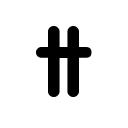

Codepoint U+00A3:


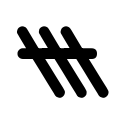

Codepoint U+00A7:


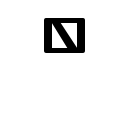

Codepoint U+00A8:


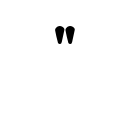

Codepoint U+00AC:


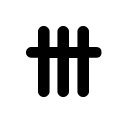

Codepoint U+00B0:


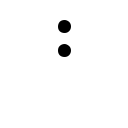

Codepoint U+00B2:


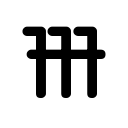

Codepoint U+00B3:


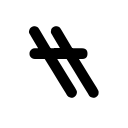

Codepoint U+00B7:


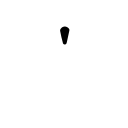

Codepoint U+00B9:


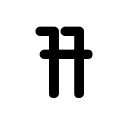

Codepoint U+00BA:


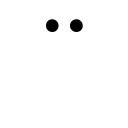

Codepoint U+00C0:


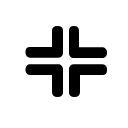

Codepoint U+00C1:


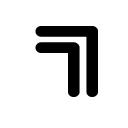

Codepoint U+00C2:


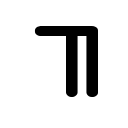

Codepoint U+00C3:


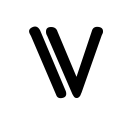

Codepoint U+00C4:


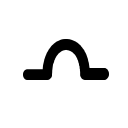

Codepoint U+00C7:


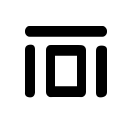

Codepoint U+00C8:


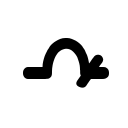

Codepoint U+00C9:


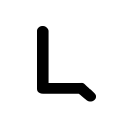

Codepoint U+00CA:


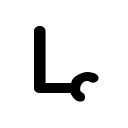

Codepoint U+00CB:


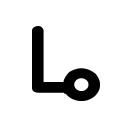

Codepoint U+00CC:


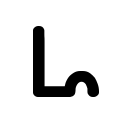

Codepoint U+00CD:


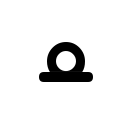

Codepoint U+00CE:


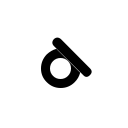

Codepoint U+00CF:


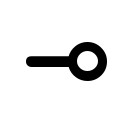

Codepoint U+00D2:


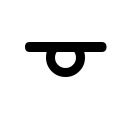

Codepoint U+00D3:


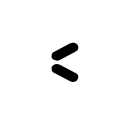

Codepoint U+00D4:


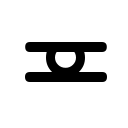

Codepoint U+00D5:


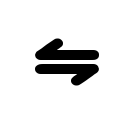

Codepoint U+00D6:


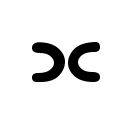

Codepoint U+00D9:


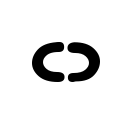

Codepoint U+00DA:


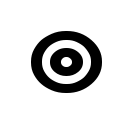

Codepoint U+00DB:


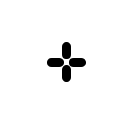

Codepoint U+00DC:


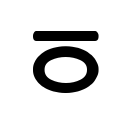

Codepoint U+00DD:


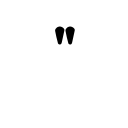

Codepoint U+00E0:


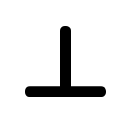

Codepoint U+00E1:


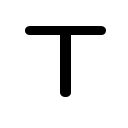

Codepoint U+00E2:


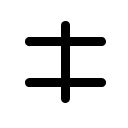

Codepoint U+00E3:


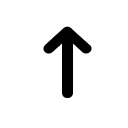

Codepoint U+00E4:


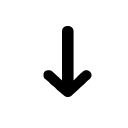

Codepoint U+00E7:


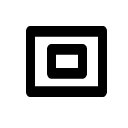

Codepoint U+00E8:


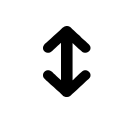

Codepoint U+00E9:


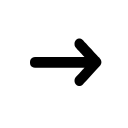

Codepoint U+00EA:


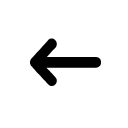

Codepoint U+00EB:


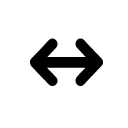

Codepoint U+00EC:


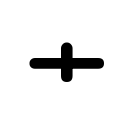

Codepoint U+00ED:


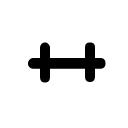

Codepoint U+00EE:


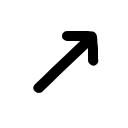

Codepoint U+00EF:


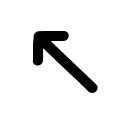

Codepoint U+00F1:


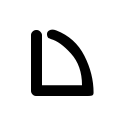

Codepoint U+00F2:


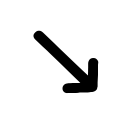

Codepoint U+00F3:


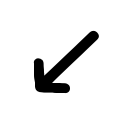

Codepoint U+00F4:


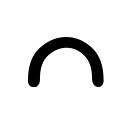

Codepoint U+00F5:


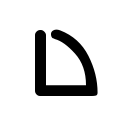

Codepoint U+00F6:


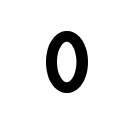

Codepoint U+00F9:


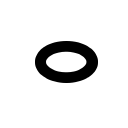

Codepoint U+00FA:


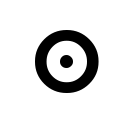

Codepoint U+00FB:


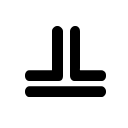

Codepoint U+00FC:


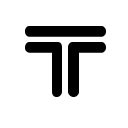

Codepoint U+00FD:


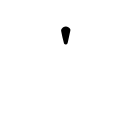

In [21]:
# Exibir glifo do codepoint U+0021 a U+00FD
for cp in range(0x0021, 0x00FE):
    if cp in codepoints:
        print(f'Codepoint U+{cp:04X}:')
        render_glyph_bitmap(FONT_PATH, cp, image_size=128)